In [ ]:
key = 'b6acdd700eb4e92c842662a64de49cf5f29744a0'  # Tiingo API key

In [ ]:
# importing the data
import pandas_datareader as pdr

df = pdr.get_data_tiingo('AAPL',api_key = key)

<ipython-input-2-b13fca6040e0>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key = key)


In [ ]:
# importing the dependencies
import pandas as pd

In [ ]:
df.to_csv('GOOGL.csv')

In [ ]:
df = pd.read_csv('GOOGL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-10-22 00:00:00+00:00,220.65,223.36,218.94,219.79,28792082,52.827106,53.475923,52.417705,52.621209,115168328,0.0,1.0
1,AAPL,2018-10-23 00:00:00+00:00,222.73,223.25,214.70,215.83,38767846,53.325091,53.449587,51.402582,51.673122,155071384,0.0,1.0
2,AAPL,2018-10-24 00:00:00+00:00,215.09,224.23,214.54,222.60,40925163,51.495954,53.684215,51.364275,53.293967,163700652,0.0,1.0
3,AAPL,2018-10-25 00:00:00+00:00,219.80,221.38,216.75,217.71,29855768,52.623603,53.001880,51.893384,52.123224,119423072,0.0,1.0
4,AAPL,2018-10-26 00:00:00+00:00,216.30,220.19,212.67,215.90,47258375,51.785647,52.716975,50.916568,51.689881,189033500,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1.head()

0    220.65
1    222.73
2    215.09
3    219.80
4    216.30
Name: close, dtype: float64

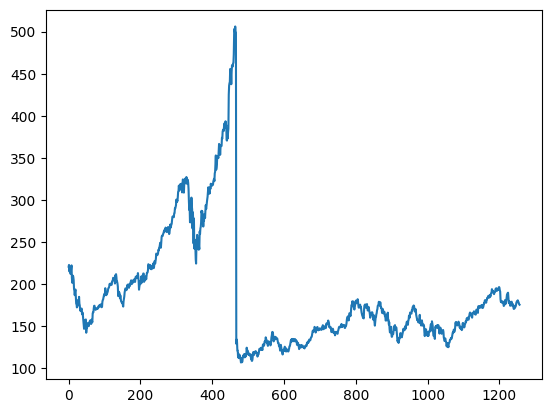

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np

In [ ]:
# scaling the dataset in range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.28505949],
       [0.29026925],
       [0.27113338],
       ...,
       [0.1761052 ],
       [0.17282405],
       [0.17187226]])

In [ ]:
# splitting the dataset into train and test split
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [ ]:
train_size,test_size

(817, 440)

In [ ]:
# converting an array of values into a dataset matrix
def create_dataset(dataset,time_step = 1):
  datax, datay = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i + time_step, 0])
  return np.array(datax),np.array(datay)

In [ ]:
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test,y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train)

[[0.28505949 0.29026925 0.27113338 ... 0.1925861  0.19857232 0.20333125]
 [0.29026925 0.27113338 0.28293049 ... 0.19857232 0.20333125 0.19959925]
 [0.27113338 0.28293049 0.27416406 ... 0.20333125 0.19959925 0.2036819 ]
 ...
 [0.10737633 0.10715091 0.10399499 ... 0.1636819  0.17092048 0.17204759]
 [0.10715091 0.10399499 0.10194114 ... 0.17092048 0.17204759 0.1636819 ]
 [0.10399499 0.10194114 0.10459612 ... 0.17204759 0.1636819  0.16588604]]


In [ ]:
# reshape input to be [samples,time steps,features] which is requiered for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
# creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
12/12 [==============================] - 14s 652ms/step - loss: 0.0500 - mse: 0.0500 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2/100
12/12 [==============================] - 5s 419ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/100
12/12 [==============================] - 4s 372ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 3.9060e-04 - val_mse: 3.9060e-04
Epoch 4/100
12/12 [==============================] - 4s 302ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 3.3692e-04 - val_mse: 3.3692e-04
Epoch 5/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.0419e-04 - val_mse: 6.0419e-04
Epoch 6/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 3.0892e-04 - val_mse: 3.0892e-04
Epoch 8/100
12/12 [=================

In [ ]:
train_predict = model.predict(x_train)   # taking the prediction of the model
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 32ms/step


In [ ]:
# transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# calculating the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

219.45740245184285

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

159.96183228444679

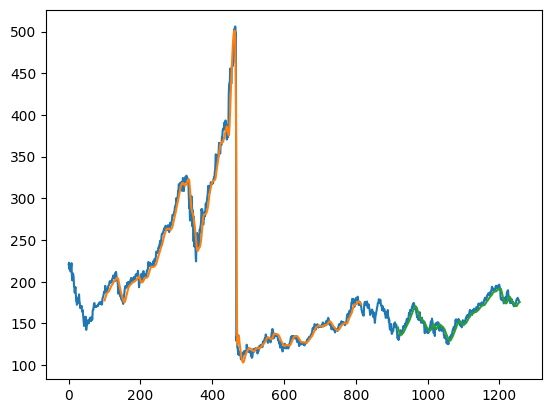

In [ ]:
# ploting the stock price graph
# shift train predictions for plotting
look_back = 100
trainPredictplot = np.empty_like(df1)
trainPredictplot[:,:] = np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictplot = np.empty_like(df1)
testPredictplot[:,:] = np.nan
testPredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# finding predictions of next 30 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):

  if(len(temp_input)>100):
    # print(temp_input)
    x_input = np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    # print(x_input)
    yhat = model.predict(x_input,verbose = 0)
    print('{} day output {}'.format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    # print(temp_input)
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i+1
print(lst_output)

0 day input [0.17976205 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801
 0.20753914 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621
 0.16874139 0.17257358 0.17074515 0.17815905 0.18091421 0.1719474
 0.16804008 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486
 0.1612273  0.16758923 0.16420789 0.16736381 0.17049468 0.17695679
 0.18071384 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757
 0.1761052  0.17282405 0.17187226 0.173585   0.17319533 0.17259808
 0.17188293 0.17109977 0.17027541 0.16942471 0.16855703 0.16767919
 0.16679688 0.16591479 0.16503698 0.1641665  0.16330564 0.16245565
 0.16161714 0.16079013 0.1599741  0.15916827 0.15837182 0.15758352
 0.15680259 0.15602812 0.15525937 0.15449578 0.15373699 0.15298273
 0.15223294 0.15148766 0.15074706 0.15001144 0.14928104 0.14855626
 0.14783743 0.14712498 0.1464192  0.14572047 0.14502901 0.14434509
 0.14366888 0.14300056 0.14234017 0.14168777 0.14104341 0.14040697
 0.13977848 0.13915785 0.13854496 0.13793969 0.1373

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(df1)

1257

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

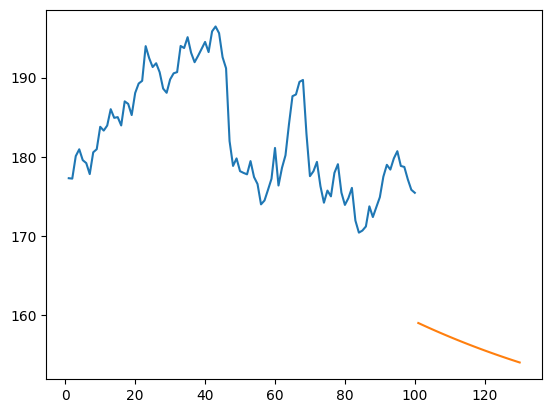

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

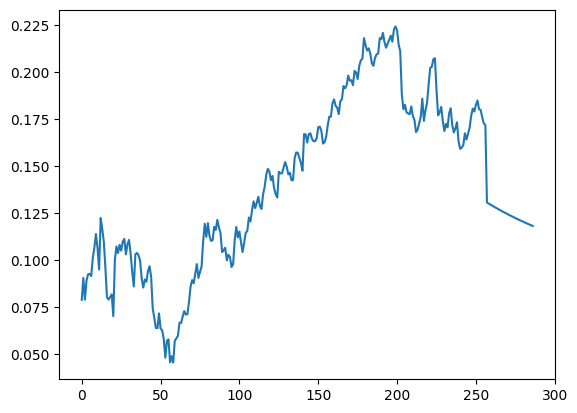

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])